Linear regression is considered the basic application in Machine Learning.
It lies in the category of supervised learning, among the others, unsupervised and reinforcement learning.

In supervised learning, we consider a set of $X$ training samples that are corresponded to a same number of $Y$ training labels. In order to predict a new(unknown) sample, we have to make a model that has the ability to generalise well enough from the already known data.

In this example, a simple linear regression problem, the model learns to draw a straight line that fits to the best at the distributed data.
$Fitting$ is a repetitive process where in every learning cycle, an assessment of the model is made in respect to minimise the residual error of each prediction.

Reference to [Thanos Tagaris](https://github.com/djib2011) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define static randomness
np.random.seed(1)

# Define the dataset
x = np.linspace(0,50,100)
y = x + np.random.random(100) * 15

Text(0.5, 1.0, 'Data x over their labels y')

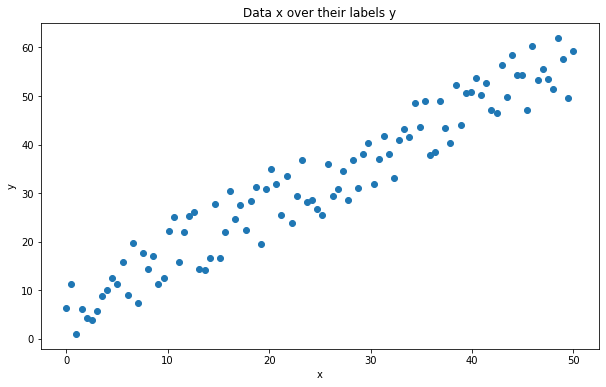

In [3]:
# Plot the dataset
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data x over their labels y')

Once we have plot our data, we are going to find a line that is the best fit to the data.

## Plot a random line

Text(0.5, 1.0, 'Data x over their labels y / A random line')

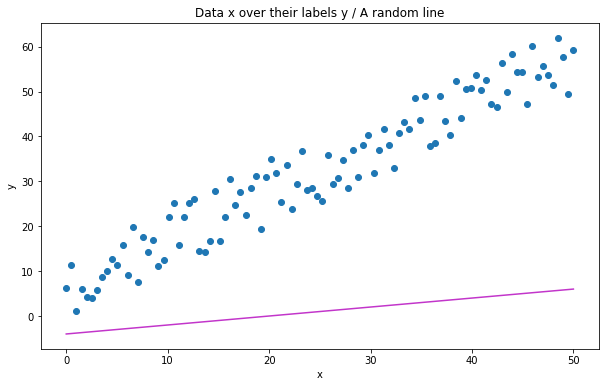

In [4]:
# y = w * x + b
# Initialise w,b
w = 0.2
b = -4
y1 = w * x + b

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(x,y)
ax.plot(x,y1,c='#c235ca')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data x over their labels y / A random line')

In order to fit the line on the data, we need to measure the distance from the goal. 
To quantify this distance, we need a performance metric in other words a loss function. This metric will also measure how good or bad is doing with learning the data.
As our problem is linear regression, meaning that the values we are trying to predict are continuous values, we are going to you use **Mean Squared Error** (MSE). Of course there is a number of loss functions that can be used in a linear regression problem such **Mean Absolute Error** or **Huber Loss**, but for a toy example we can keep it simple.

- Let's start by initiliasing a random line as above.
- We define the MSE
- Measure the residual error from the actual data

In [5]:
# Initialize w and b randomly
w = np.random.random()
b = np.random.random()
y1 = w*x + b

In [6]:
def mse(y,y_hat):
    return ((y-y_hat)**2).sum() / len(y)

In [7]:
print("MSE: %.4f " % mse(y,y1))

MSE: 685.9313 


Now, we are going to start the training process, where we are going improve the fitting line.
The performance metric that will be used to improve the model's performance is called **loss function** and the goal is to minimise it.

Let's take a closer look to the loss function:

$$
L(w,b) = 
\frac{1}{N} \cdot \sum_{i=1}^N{\left( y- \hat y \right) ^2 } = 
\frac{1}{N} \cdot \sum_{i=1}^{N}{\left( y- (w \cdot x + b \right)) ^2 }
$$

We can see that the function is depended to $w$ and $b$. In order to observe their impact in training process we plot the $mse$ regarding one of the two values constant.

In [8]:
# Keep b as a constant, calculate y_hat for a range of W values

# Arange some w values
W = np.arange(0, 3, 0.02)

# Calculate all the different y values for the same b
y_on_w = [ w_temp*x + b for w_temp in W ]

# Compute MSE, between the temporary y in respect to the groundtruth
mse_w = [mse(y,y_temp) for y_temp in y_on_w]

# Keep the W value that corresponds to minimum MSE(distance) from the groundtruth
best_w = W[np.argmin(mse_w)]

In [9]:
# Keep W as a constant, calculate y_hat for a range of B values

# Arange some b values
B = np.arange(-20, 80, 0.5)

# Calculate all the different y values for the same w
y_on_b = [ w*x + b_temp for b_temp in B]

# Compute MSE, between the temporary y in respect to the groundtruth
mse_b = [mse(y,y_temp) for y_temp in y_on_b]

# Keep the B value that corresponds to minimum MSE(distance) from the groundtruth
best_b = B[np.argmin(mse_b)]

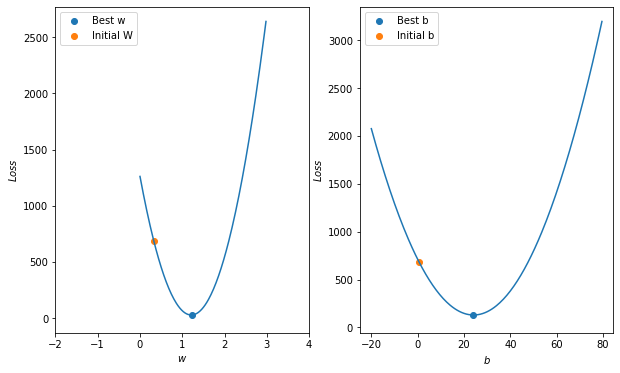

In [10]:
# Calculate the MSE from initial values
L = mse(y,y1)

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.set_xlim([-2,4])

ax1.plot(W,mse_w)
ax1.scatter(best_w,min(mse_w),label='Best w')
ax1.scatter(w,L,label='Initial W')
ax1.set_xlabel('$w$')
ax1.set_ylabel('$Loss$')

ax2.plot(B,mse_b)
ax2.scatter(best_b,min(mse_b),label='Best b')
ax2.scatter(b,L,label='Initial b')
ax2.set_xlabel('$b$')
ax2.set_ylabel('$Loss$')

ax1.legend()
ax2.legend()

Figures depict the loss change between the initial values and the minimum(best) values of $b$ and $w$.

From the above example minima was found by just calculating the loss from a hardcoded range of values.
Although, we need to find a smarter way in order to navigate from the initial position to the best position (lowest minima), optimising simultaneously both $b$ and $w$.

We can tackle this problem using **gradient descent** algorithm.
Gradient descent computes the gradients in each of the coefficients $b$ and $w$, which is actually the $slope$ at the current position. Given the slope, we know the direction to follow in order to reduce(minimise) the cost function.

So we need to compute the following derivatives:
$$
\frac{dL}{dw} , \frac{dL}{db}
$$

After that we need to update the previous values with the new ones, by a defined strategy.

$$
w^{new} = w - a \frac{dL}{dw}
\\
b^{new} = w - a \frac{dL}{db}
$$

where $a$ is the a hyperparameter for the $learning$ $rate$ which is a factor that defines how big or small will be the step towards the minima.

Moving forward we can automate the process calculating a new prediction $\hat y$, each time we update $weight$ and $bias$

In [11]:
def predict(x):
    return w * x + b

And plot the predicted fit line, over the dataset based on initialiased values for $w$ and $b$

Text(0.5, 1.0, 'Data x over their labels y / Prediction on initiliased variables')

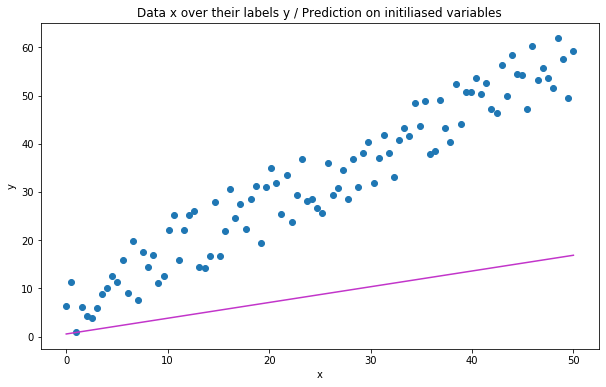

In [12]:
y_hat = predict(x)

fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(x,y)
ax.plot(x,y_hat,c='#c235ca')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data x over their labels y / Prediction on initiliased variables')

Initialising $w$ and $b$ with random values we get a first view of our model performance.
In order to start the training process we are going to develop an algorithm that optimizes on partial derivatives

$$
\frac{dL}{dw} = - \frac{2}{N} \cdot \sum_{i=1}^N x_i \Bigl(y_i - ( w \cdot x_i - b )\Bigr)
$$
$$
\frac{dL}{db} = - \frac{2}{N} \cdot \sum_{i=1}^N \Bigl(y_i - (w \cdot x_i - b )\Bigr)
$$

In order to complete the optimization process, in other words to make our simple model learn, we should repeat the process over a number of steps(epochs).
The process ends when the $MSE$ eventually stops to get reduced meaning that the model has reached its highest performance.

Drilling down the algorithm:
- Learning Process
    - Initialise with random values
    - For a range of epochs
     > Predict, Compute slope(gradients) & Update w,b
    - Evaluate with MSE
- Inference data on trained model

In [13]:
w = np.random.random()
b = np.random.random()

In [14]:
def compute_derivatives(x,y):
   
    dw = 0
    db = 0
    N = len(x)
    for i in range(N):
        x_i = x[i]
        y_i = y[i]
        y_hat = predict(x_i)
        dw += -(2/N) * x_i * (y_i - y_hat)        
        db += -(2/N) * (y_i - y_hat)
    
    return dw,db

def update(x,y, a=0.0002):
    
    dw,db = compute_derivatives(x,y)
    # Update previous w,b
    new_w = w - (a*dw)
    new_b = b - (a*db)
    
    return new_w, new_b

In [15]:
# Epoch 1
w1, b1 = w,b
y1 = predict(x)
w,b = update(x,y)
mse1 = mse(y,y1)
print(mse(y,y1))

# Epoch 2
w2, b2 = w,b
y2 = predict(x)
w,b = update(x,y)
print(mse(y,y2))

# Epoch 3
w3, b3 = w,b
y3 = predict(x)
w,b = update(x,y)
print(mse(y,y3))

# Inference
y4 = predict(x)
print(mse(y,y4))


120.21993914312635
68.43310896388319
45.55244617962547
35.44269003662942


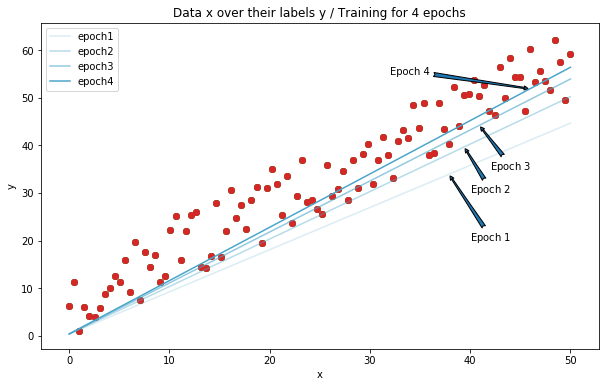

In [16]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(x,y)
ax.plot(x,y1,c='#4aa5ca',label='epoch1', alpha=0.2)
ax.annotate('Epoch $1$', xy=(x[3*int(len(y1)/4)], y1[3*int(len(y1)/4)]),
            xytext=(40, 20), 
            arrowprops=dict(arrowstyle='fancy')
           )

ax.scatter(x,y)
ax.plot(x,y2,c='#4aa5ca',label='epoch2', alpha=0.4)
ax.annotate('Epoch $2$', xy=(x[3*int(len(y1)/4)+3], y2[3*int(len(y1)/4)+3]),
            xytext=(40, 30), 
            arrowprops=dict(arrowstyle='fancy')
           )

ax.scatter(x,y)
ax.plot(x,y3,c='#4aa5ca',label='epoch3', alpha=0.6)
ax.annotate('Epoch $3$', xy=(x[3*int(len(y1)/4)+6], y3[3*int(len(y1)/4)+6]),
            xytext=(42,35), 
            arrowprops=dict(arrowstyle='fancy')
           )

ax.scatter(x,y)
ax.plot(x,y4,c='#4aa5ca',label='epoch4')
ax.annotate('Epoch 4', xy=(x[3*int(len(y1)/4)+16], y4[3*int(len(y1)/4)+16]),
            xytext=(32,55), 
            arrowprops=dict(arrowstyle='fancy')
           )

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data x over their labels y / Training for 4 epochs')

ax.legend()

Plotting the predictions in every epoch, the optimisation process is quite clear.

Now that we have formed a training algorithm, let's put them all in a $Linear Regression$ class to fully automate the process.

In [17]:
class Linear_Regression:
    
    def __init__(self, epochs=10, a=0.002):
        self.w = np.random.random()
        self.b = np.random.random()
        self.y_history = []
        self.epochs = epochs
        self.a = a
    
    def predict(self,x):    
        return self.w * x + self.b
    
    def mse(y,y_hat):
        return ((y-y_hat)**2).sum() / len(y)
    
    def compute_derivatives(self,x,y):

        y_hat = self.predict(x)
        dw = - (2 / sum(x)) * sum(x * (y - y_hat))
        db = - (2 / sum(x)) * sum(y - y_hat)

        return dw,db

    def update(self, x, y):

        dw,db = self.compute_derivatives(x,y)
        # Update previous w,b
        self.w -= (self.a*dw)
        self.b -= (self.a*db)
        self.cost_function(x,y)
    
    def cost_function(self, x,y):
        
        y_hat = self.predict(x)
        self.y_history.append(y_hat)
        print("MSE: {}".format(mse(y,y_hat)))
        
    def history(self):
        return self.y_history
       
    def fit(self, x, y):        
        for e in range(self.epochs):
            self.update(x,y)        

In [18]:
lr = Linear_Regression(20,0.003)

In [19]:
lr.fit(x,y)

MSE: 75.52248536936622
MSE: 57.84886691375209
MSE: 46.571018682379474
MSE: 39.37430260220585
MSE: 34.781751328838716
MSE: 31.85091404812619
MSE: 29.980414202576668
MSE: 28.786514244859887
MSE: 28.02435177819998
MSE: 27.53768044679305
MSE: 27.226799667683572
MSE: 27.028090637150843
MSE: 26.90095828476454
MSE: 26.819498952376684
MSE: 26.767183551642244
MSE: 26.73346489420633
MSE: 26.71161283380195
MSE: 26.697332873424738
MSE: 26.68788470048701
MSE: 26.68151972532192


In [20]:
y_history = lr.history()

Text(0.5, 1.0, 'Training for 20 epochs')

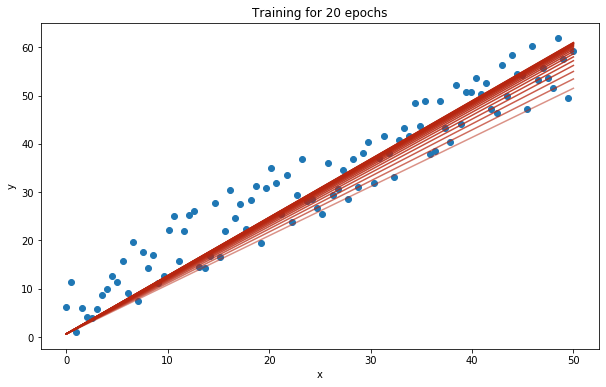

In [21]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(x,y)
for i in range(len(y_history)):
    ax.plot(x,y_history[i], c='#b72610',label=str(i+1)+" epoch", alpha = i/(i+1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Training for {} epochs'.format(lr.epochs))